**Siguientes pasos:**
1. Análisis de resultados obtenidos
2. Agente de optimización 

**Preguntar a Raúl**
- Tengo bastantes buenos resultados con modelos más sencillos. Aun así intento con redes neuronales y deep learning no?
- Cómo analizo las features más relevantes los modelos (a parte del árbol de decisión)?
- Pruebo a ir quitando features y vuelvo a aplicar el modelo? 
- Quito features como población y demás para ver como varía el error?
- Idea que sería interesante: Deep Learning con Dropout, entrenada con el dataset relleno pero al meterle los valores de test, dejar los NaNs y desactivar esas neuronas, funcionaría?
- Problema: Al dehacer la trnasformación Yeo-Johnson, para valores menores a -2.7 devuelve un NaN.

Memoria: 
- Qué es mejorable?
- Cito todas las páginas web que he ido usando para escribir las descripciones de conceptos? Cito las páginas web donde vi lo del MICE y KNN para rellenar NaNs?
- Podría ser interesante enfocar la memoria como un flujo completo de un proyecto de Data Science: 
  - Objetivo
  - Obtención de los datos
  - Limpieza de datos
  - Análisis de datos
  - Refinar los datos
  - Creación de modelos
  - Validación de modelos(Conjunto de test)
  - Evaluar los modelos(Análisis de resultados)
  - (Interfaz de despliegue)
  - Conclusiones
  - Referencia(Barton Poulson Professor, Designer, Data Analytics Expert - Curso LinkedIn)

Modelos a aplicar:
- Regresión lineal
- Regresion polinomica???
- Elastic-Net, Lasso o Ridge? He probado Elastic-Net y no mejora nada. No lo incluyo no??
- KNN
- Random Forrest para Regresion. Investigar Regression-Enhanced Random Forests
- SVM Regressor
- Red de neuronas mínima
- Deep learning con dropout

**TO DO:**
- Investigar recomendaciones, pautas y estrategias para un correcto preprocesamiento de un dataset
- Investigar todas los modelos de regresión y diferentes aproximaciones que se pueden realizar
- Decisión de todos los algoritmos vamos a aplicar
- Hacer árbol de decisión para registrar todas las posibles pruebas a realizar
- Investigar Power BI y Redes Neurales + Deep Learning

**Planificación Calendario**
* 27/03 - 18/04 (3 Semanas) -> Análisis y preprocesamiento
* 18/04 - 23/05 (5 Semanas) -> Modelos
* 23/05 - 13/06 (3 Semanas) -> Análisis de resultados
* 13/06 - 20/06 (1 Semana) -> Finiquitar memoria
* 20/06 ENTREGA DEL TFG
* 20/06 - 30/06 (1-2 semanas) -> Preparar presentación
* 30/06 PRESENTACIÓN TFG

# Importar Liberías

In [1]:
import pandas as pd
import numpy as np
import sklearn 
pd.set_option("display.max_columns", None)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras import backend as K

# Importar dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/MiguelRocaGarcia/DatasetTFG/master/PreprocessedDataset.csv', sep=',')

In [3]:
df

,Year,Female,Male,Life Expectancy,% Death Cardiovascular,Low CI Value % Death Cardiovascular,High CI Value % Death Cardiovascular,Suicides Rate,Alcohol Abuse,Poisoning Mortality Rate,Tobacco Prevalence,Maternal Mortality Ratio,Low CI Value Maternal Mortality Ratio,High CI Value Maternal Mortality Ratio,% of Births Attended By Skilled Personal,Low CI Value Neonatal Mortality Rate,High CI Value Neonatal Mortality Rate,Incidence of Malaria,Incidence of Tuberculosis,Low CI Value Incidence of Tuberculosis,High CI Value Incidence of Tuberculosis,Road Traffic Deaths,Adolescent Birth Rate,Universal Heath Care Coverage,Population 10 Percentage SDG Total,Population 10 Percentage SDG Urban,Population 10 Percentage SDG Rural,Population 25 Percentage SDG Total,Population 25 Percentage SDG Urban,Population 25 Percentage SDG Rural,Doctors,Nurses and Midwifes,Dentists,Pharmacists,Basic Drinking Water Services,Basic Sanization Services Total,Basic Sanization Services Urban,Basic Sanization Services Rural,Safely Sanitation Total,Safely Sanitation Urban,Safely Sanitation Rural,Basic Hand Washing Total,Basic Hand Washing Urban,Basic Hand Washing Rural,Clean Fuel and Technology,Birth Rate,% Injury Deaths,GDP per Capita,% Population $1.90 a day,% Population $3.20 a day,% Population $5.50 a day,Income per Capita,GNI per Capita,Homicide Rate,Government Expenditure Education,Government Expenditure Military,Government Expenditure Health,Diet Composition Alcoholic Beverages,Diet Composition Other,Diet Composition Sugar,Diet Composition Oils And Fats,Diet Composition Meat,Diet Composition Dairy And Eggs,Diet Composition Fruit And Vegetables,Diet Composition Starchy Roots,Diet Composition Pulses,Diet Composition Cereals And Grains,Vegetable Consumption,Fruit Consumption Plantains,Fruit Consumption Other,Fruit Consumption Bananas,Fruit Consumption Dates,Fruit Consumption Other Citrus,Fruit Consumption Oranges And Mandarines,Fruit Consumption Apples,Fruit Consumption Lemons And Limes,Fruit Consumption Grapes,Fruit Consumption Grapefruit,Fruit Consumption Pineapples,Cereal Consumption Oats,Cereal Consumption Rye,Cereal Consumption Barley,Cereal Consumption Sorghum,Cereal Consumption Maize,Cereal Consumption Wheat,Cereal Consumption Rice,Diet Calories Animal Protein,Diet Calories Plant Protein,Diet Calories Fat,Diet Calories Carbohydrates,Intervention Against NTDs per capita,Battle Related Deaths %,Conflict and Terrorism Deaths %
0,-1.676227,1,1,-1.825002,1.629825,1.151656,1.787622,-0.424739,-1.748284,0.650398,0.298001,1.685719,1.705833,1.649378,-1.820942,2.239631,2.192144,1.144189,0.832045,0.774706,0.868034,-0.067297,1.114087,-1.696018,0.605981,0.317658,0.789480,0.128569,-0.117456,0.282129,-0.879284,-0.823508,-1.105355,-0.995915,-1.620780,-1.369504,-1.487599,-1.13736,-0.135786,0.061680,-0.212496,-1.344025,-0.878088,-1.286744,-1.180606,1.693061,0.703510,-1.234485,1.141577,1.011651,0.877374,-0.957778,-1.199503,1.036136,0.119047,0.268992,-1.332915,-1.915939,-0.963103,-1.857954,-1.020971,-0.570214,-0.328249,-1.014217,-1.094397,-0.653199,1.608152,-0.701695,-1.047727,0.120381,-1.782620,-0.713765,0.537511,-1.147773,-0.634874,-1.268732,1.388040,1.473620,-1.304963,-0.455426,0.848120,1.754349,0.031983,0.645311,1.441317,0.182443,-0.721431,0.793942,-0.848394,-0.317147,0.987922,0.451751,3.845371
1,-1.676227,1,0,-1.713459,1.629825,1.151656,1.787622,-0.424739,-1.748284,0.650398,0.298001,1.685719,1.705833,1.649378,-1.820942,2.239631,2.192144,1.144189,0.832045,0.774706,0.868034,-0.067297,1.114087,-1.696018,0.605981,0.317658,0.789480,0.128569,-0.117456,0.282129,-0.879284,-0.823508,-1.105355,-0.995915,-1.620780,-1.369504,-1.487599,-1.13736,-0.135786,0.061680,-0.212494,-1.344025,-0.878088,-1.286744,-1.180606,1.693061,0.703510,-1.234485,1.141609,1.011682,0.877400,-0.957778,-1.199503,1.036136,0.119047,0.268992,-1.332915,-1.915939,-0.963103,-1.857954,-1.020971,-0.570214,-0.328249,-1.014217,-1.094397,-0.653199,1.608152,-0.701695,-1.047727,0.120381,-1.782620,-0.713765,0.537511,-1.14

# Separación de la variable objetivo

In [4]:
X = df.drop(columns=['Life Expectancy'])
y = df['Life Expectancy']

# División en conjunto de entrenamiento y de test

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [ ]:
y_test_unstandarized = scaler.inverse_transform(y_test.values.reshape(-1,1)).flatten()

# Modelos

In [6]:
#Función para deshacer la estandarización  en la variable objetivo
df_filled = pd.read_csv('https://raw.githubusercontent.com/MiguelRocaGarcia/DatasetTFG/master/FilledDataset.csv',sep=',')
scaler = StandardScaler()
scaler.fit(df_filled['Life Expectancy'].values.reshape(-1,1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [43]:
#Error de entrenamiento y de test según diferentes métricas de medida:
def errorMetrics(y_train_predicted,y_test_predicted):
  y_test_predicted_unstandarized = scaler.inverse_transform(y_test_predicted)

  print("\nRMSE Train standarized values: ", str(mean_squared_error(y_train, y_train_predicted, squared = False)))
  print("RMSE Test standarized values: ", str(mean_squared_error(y_test, y_test_predicted, squared = False)))
  print("RMSE Test absolute values: ", str(mean_squared_error(y_test_unstandarized, y_test_predicted_unstandarized, squared = False)))

  print("\nMAE Train standarized values: ", str(mean_absolute_error(y_train, y_train_predicted)))
  print("MAE Test standarized values: ", str(mean_absolute_error(y_test, y_test_predicted)))
  print("MAE Test absolute values: ", str(mean_absolute_error(y_test_unstandarized, y_test_predicted_unstandarized)))

  print("\nR2 Train: ", str(r2_score(y_train, y_train_predicted)))
  print("R2 Test: ", str(r2_score(y_test, y_test_predicted)))

## Regresión Lineal

In [8]:
#Entrenamiento
linear = LinearRegression()
linear.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
print("Regresión Lineal:")
errorMetrics(linear.predict(X_train), linear.predict(X_test))

Regresión Lineal:

RMSE Train standarized values:  0.2617426041466155
RMSE Test standarized values:  0.2671376612265125
RMSE Test absolute values:  2.6607526051256154

MAE Train standarized values:  0.19097156727415981
MAE Test standarized values:  0.19684791457753317
MAE Test absolute values:  1.9606505466917452

R2 Train:  0.9312631609550672
R2 Test:  0.9295686700097345


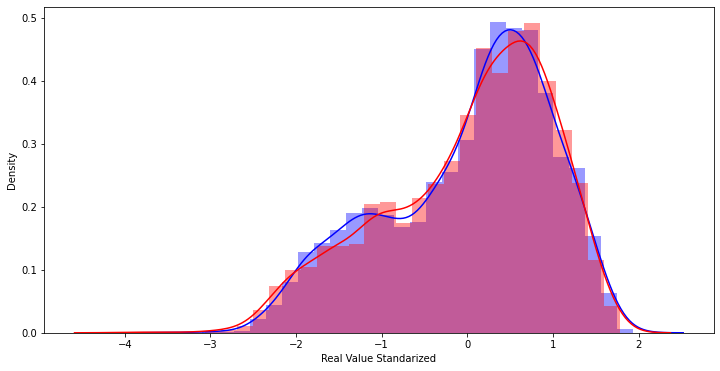

In [ ]:
#Mostrar distribución de la variable objetivo real y calculada
plt.figure(figsize=(12,6))
sns.distplot(linearPredictions['Prediction Standarized'], color='b')
sns.distplot(linearPredictions['Real Value Standarized'], color='r')

## Elastic-Net

In [ ]:
#GridSearch de la regresión Elastic-Net para optimizar R2

grid_EN = GridSearchCV(
    ElasticNet(),
    {'alpha': (0,0.00001,0.0001,0.001,0.1,1,10,100,1000),
    'l1_ratio': (0,0.001, 0.01, 0.1, 0.5,0.9,0.99,0.999,1)},
    scoring='r2',                                 
    cv=5,
    n_jobs=-1,
    verbose = 0,
    return_train_score = True
)

grid_EN.fit(X_train, y_train)

In [ ]:
resultados = pd.DataFrame(grid_EN.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) 

In [ ]:
errorMetrics(grid_EN.predict(X_train), grid_EN.predict(X_test))

## KNN

In [ ]:
#GridSearch de la regresión KNN para optimizar RMSE
grid_KNN = GridSearchCV(
    KNeighborsRegressor(),
    {'n_neighbors': (2,3,4,5,10),
     'weights': ('uniform', 'distance')},
     scoring='r2',                              
     cv=5,
     n_jobs=-1,
     return_train_score = True
)
grid_KNN.fit(X_train, y_train)

In [ ]:
resultados = pd.DataFrame(grid_KNN.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)

In [ ]:
errorMetrics(grid_KNN.predict(X_train), grid_KNN.predict(X_test))

## Random Forrest Regressor

In [10]:
rf = RandomForestRegressor(n_estimators=100, criterion='mse', max_depth=100, random_state=210, n_jobs=-1)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=100, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=210, verbose=0, warm_start=False)

In [11]:
errorMetrics(rf.predict(X_train), rf.predict(X_test))


RMSE Train standarized values:  0.02506700391707342
RMSE Test standarized values:  0.0697963971371311
RMSE Test absolute values:  0.6951881837190106

MAE Train standarized values:  0.015873467921012532
MAE Test standarized values:  0.041612406322740686
MAE Test absolute values:  0.41446914680777797

R2 Train:  0.9993695573637406
R2 Test:  0.9951920309783948


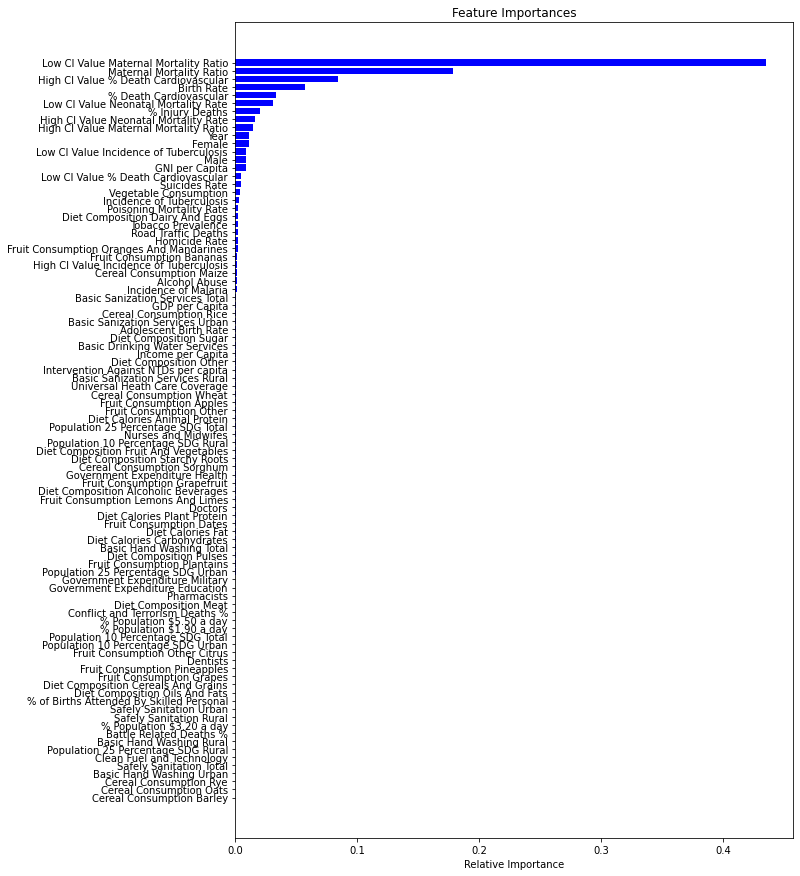

In [12]:
# plotting feature importances
features = X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Red de Neuronas

In [13]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [48]:
#Cortesía de https://jmlb.github.io/ml/2017/03/20/CoeffDetermination_CustomMetric4Keras/
def r2_score_metric(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [17]:
model = keras.Sequential([layers.Dense(350, activation=tf.nn.relu, input_shape=(len(X_train.keys()),)),
                          layers.Dense(350, activation=tf.nn.relu),
                          layers.Dense(1)])
                         
optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse', r2_score_metric])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 350)               32550     
_________________________________________________________________
dense_1 (Dense)              (None, 350)               122850    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 351       
Total params: 155,751
Trainable params: 155,751
Non-trainable params: 0
_________________________________________________________________


In [19]:
class PrintEpochMetrics(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if (epoch%100 == 0):
      print(logs)

In [20]:
#Early stop: Para cuando el valor de validación empieza a empeorar respectp al de entrenamiento
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=30)

hist = model.fit(X_train, y_train, epochs=1000, verbose=0, validation_split=0.2, callbacks=[early_stop, PrintEpochMetrics()])

{'loss': 0.10748153924942017, 'mae': 0.22151172161102295, 'mse': 0.10748153924942017, 'r2_score_metric': 0.8782344460487366, 'val_loss': 0.03476012870669365, 'val_mae': 0.13338153064250946, 'val_mse': 0.03476012870669365, 'val_r2_score_metric': 0.9606201648712158}


In [21]:
pd.DataFrame(hist.history)

,loss,mae,mse,r2_score_metric,val_loss,val_mae,val_mse,val_r2_score_metric
0,0.107482,0.221512,0.107482,0.878234,0.034760,0.133382,0.034760,0.960620
1,0.031156,0.124826,0.031156,0.967502,0.036007,0.148756,0.036007,0.961157
2,0.022090,0.103844,0.022090,0.977038,0.018846,0.099990,0.018846,0.979823
3,0.018100,0.092016,0.018100,0.981044,0.009699,0.065192,0.009699,0.990056
4,0.014832,0.084392,0.014832,0.984489,0.008481,0.065442,0.008481,0.990885
...,...,...,...,...,...,...,...,...
67,0.002437,0.033805,0.002437,0.997447,0.003257,0.041420,0.003257,0.996430
68,0.002455,0.033465,0.002455,0.997467,0.002512,0.035295,0.002512,0.997166
69,0.002432,0.033259,0.002432,0.997518,0.003303,0.043726,0.003303,0.996255
70,0.002365,0.033124,0.002365,0.997527,0.002342,0.031886,0.002342,0.997403


In [22]:
def plotHistory(history):
  history = pd.DataFrame(hist.history)
  history['epoch'] = hist.epoch 

  plt.figure(figsize=(12,6))
  plt.xlabel('Epoch')
  plt.ylabel('Root Mean Squared Error(RMSE)')
  plt.plot(history['epoch'], (history['mse'] ** 1/2), label='Train Error')
  plt.plot(history['epoch'], (history['val_mse'] ** 1/2), label='Validation Error')
  plt.legend()

  plt.figure(figsize=(12,6))
  plt.xlabel('Epoch')
  plt.ylabel('Mean Absolute Error(MAE)')
  plt.plot(history['epoch'], history['mae'], label='Train Error')
  plt.plot(history['epoch'], history['val_mae'], label='Validation Error')
  plt.legend()

  plt.figure(figsize=(12,6))
  plt.xlabel('Epoch')
  plt.ylabel('Coefficient of Determination R2')
  plt.plot(history['epoch'], history['r2_score_metric'], label='Train Error')
  plt.plot(history['epoch'], history['val_r2_score_metric'], label='Validation Error')
  plt.legend()

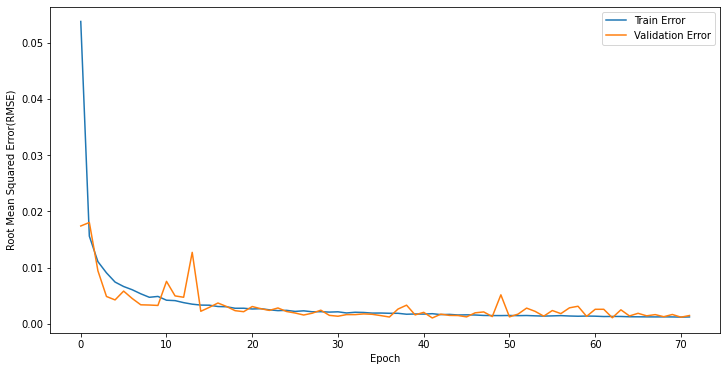

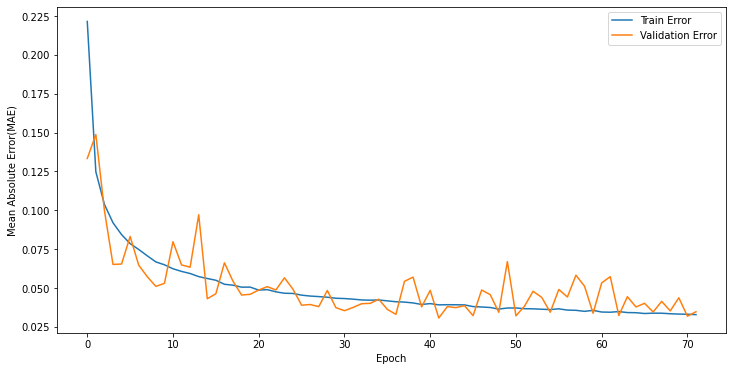

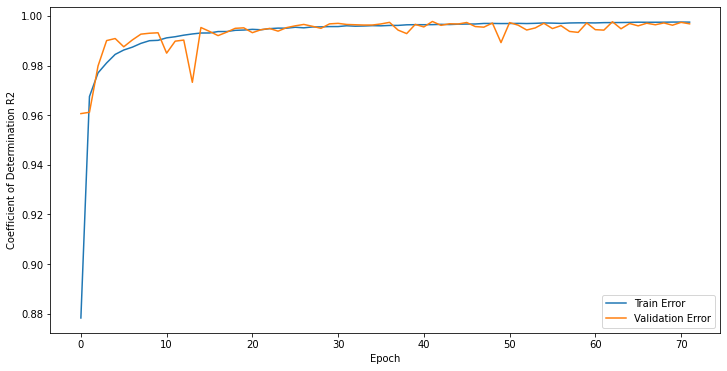

In [23]:
plotHistory(hist)

In [24]:
print('Red de Neuronas:')
errorMetrics(model.predict(X_train).flatten(),model.predict(X_test).flatten())

Red de Neuronas:

RMSE Train standarized values:  0.04611203536087126
RMSE Test standarized values:  0.05530476244471332
RMSE Test absolute values:  0.5508481430201494

MAE Train standarized values:  0.030331433089825346
MAE Test standarized values:  0.03558915804649987
MAE Test absolute values:  0.3544762164308726

R2 Train:  0.9978666146769254
R2 Test:  0.9969812947294656


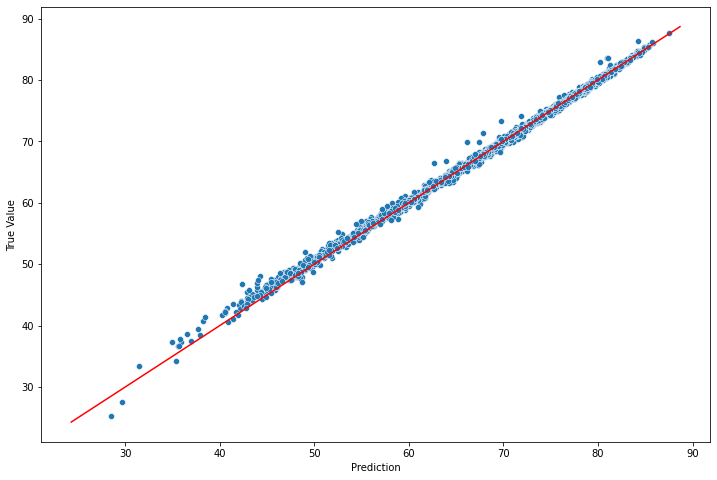

In [41]:
plt.figure(figsize=(12,8))
sns.scatterplot(y=y_test_unstandarized.flatten(), x=scaler.inverse_transform(model.predict(X_test).flatten()))
plt.xlabel('Prediction')
plt.ylabel('True Value')

plt.plot([y_test_unstandarized.min()-1, y_test_unstandarized.max()+1], [y_test_unstandarized.min()-1, y_test_unstandarized.max()+1], color='r')

In [49]:
#Guardamos el modelo
model.save('NN_Model.h5')

In [57]:
new_model = tf.keras.models.load_model('NN_Model.h5', compile=False) #same file path
new_model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse', r2_score_metric])
errorMetrics(new_model.predict(X_train).flatten(),new_model.predict(X_test).flatten())


RMSE Train standarized values:  0.04611203536087126
RMSE Test standarized values:  0.05530476244471332
RMSE Test absolute values:  0.5508481430201494

MAE Train standarized values:  0.030331433089825346
MAE Test standarized values:  0.03558915804649987
MAE Test absolute values:  0.3544762164308726

R2 Train:  0.9978666146769254
R2 Test:  0.9969812947294656
